### Copyright 2022 Edward Späth, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md

## Breadth-first Search (BFS) and Depth-first Search (DFS) with visualization

## Data structure for storing node info

In [1]:
class Node:
    node_id = 0
    def __init__(self, name_input):
        self.name = name_input
        self.predecessor = 'NIL'
        self.distance = '∞'
        self.adjacencylist = []
        self.weightlist = []
        my_dict[self.name] = Node.node_id
        Node.node_id += 1
        # For DFS
        self.t_discovered = 'NIL'
        self.t_finished = 'NIL'

## Global variables for storing information

In [2]:
WEIGHTED_GRAPH = True # All booleans can be changed below. Please do not change them here!
DIRECTED_GRAPH = True
GRAPHS_PER_LINE = 2
BFS_DISPLAY_STEP_BY_STEP = False
my_dict = {} # for easier access, each node's name returns said node's index in the list if hashed. 
             # nodes is the only list which stores objects. All the other lists only store names, which can then be hashed to access the actual object
nodes = []
discovered_nodes = [] # Referred to as 'Gray' Nodes in FRA-UAS AlgDat lecture materials (Discovered)
visited_nodes = []    # Referred to as 'Black' Nodes...
                      # Referred to as 'White' Nodes... (being in neither one of those lists)
currently_visiting = [] # For highlighting the currently visited node
current_step = 0
visited_nodes_steps, discovered_nodes_steps = [], []

In [3]:
def reset(): # Resets data after results were printed
    global discovered_nodes, visited_nodes, currently_visiting, current_step, visited_nodes_steps, discovered_nodes_steps, time
    discovered_nodes, visited_nodes = [], []
    currently_visiting = []
    current_step = 0
    visited_nodes_steps, discovered_nodes_steps = [], []
    time = 0 # For DFS
    # Set node statistics back to initial values.
    for node in nodes:  
        node.predecessor = 'NIL'
        node.distance = '∞'
        node.t_discovered = 'NIL'
        node.t_finished = 'NIL'

## Output colors

In [4]:
# Node color in output. Defaults are 'white', 'lightgray', 'slategray', 'black'
COL_NODE_UNDISCOVERED = 'white'
COL_NODE_DISCOVERED = 'lightgray'
COL_NODE_CURRENTLY_VISITING = 'slategray' # Will highlight the last discovered node in DFS and the node currently visiting in BFS (if BFS_DISPLAY_STEP_BY_STEP = True)
COL_NODE_VISITED = 'black'
# Color for node font (black text on black background is not a good idea afterall). Defaults are 'black', 'black', 'black', 'white'
COL_FC_NODE_UNDISCOVERED = 'black'
COL_FC_NODE_DISCOVERED = 'black'
COL_FC_NODE_CURRENTLY_VISITING = 'black'
COL_FC_NODE_VISITED = 'white'

## Visualization

In [5]:
from graphviz import Digraph
from graphviz import Graph
def draw_graphs(it_was_dfs):
    global current_step # Step index
    while current_step < len(visited_nodes_steps):
        steps_taken = 0 # For label output "(Steps x - y)"
        if DIRECTED_GRAPH:
            dot = Digraph()
        else:
            dot = Graph(strict=True) # strict prevents multiple edges between two nodes, which are unnecessary in an undirected Graph
        for _ in range(GRAPHS_PER_LINE):
            if current_step >= len(visited_nodes_steps):
                break
            create_subgraph(dot)
            steps_taken += 1
        
        if current_step-steps_taken+1 == 1: # Only True for the first row of output. I want the name of the algorithm (BFS/DFS) to only be printed on the first image
            if it_was_dfs:
                algorithm_name = 'DFS '
            else:
                algorithm_name = 'BFS '
        else:
            algorithm_name = ''
        
        if steps_taken == 1:
            label_input = algorithm_name + 'Step ' + str(current_step)
        else:
            label_input = algorithm_name + 'Steps ' + str(current_step-steps_taken+1) + ' - ' + str(current_step)
        dot.attr(labelloc='t', label=label_input)
        display(dot)

In [6]:
def create_subgraph(dot):
    global current_step
    # sub represents each subgraph for a given dot object. They have to be named in the form 'cluster_x' with x being an integer
    with dot.subgraph(name='cluster_' + str(current_step)) as sub:
        # Adding the nodes
        for node in nodes:
            if node.name == currently_visiting[current_step]:
                sub.attr('node', style='filled', fillcolor=COL_NODE_CURRENTLY_VISITING, fontcolor=COL_FC_NODE_CURRENTLY_VISITING)
            elif node.name not in discovered_nodes_steps[current_step] and node.name not in visited_nodes_steps[current_step]: # case 'White'
                sub.attr('node', style='filled', fillcolor=COL_NODE_UNDISCOVERED, fontcolor=COL_FC_NODE_UNDISCOVERED)
            elif node.name not in visited_nodes_steps[current_step]: # case 'Gray'
                sub.attr('node', style='filled', fillcolor=COL_NODE_DISCOVERED, fontcolor=COL_FC_NODE_DISCOVERED)
            else: # case 'Black'
                sub.attr('node', style='filled', fillcolor=COL_NODE_VISITED, fontcolor=COL_FC_NODE_VISITED)
            sub.node(str(current_step)+str(node.name), node.name)
        # Adding the edges
        for node in nodes:
            for weight_index, adjacent_name in enumerate(node.adjacencylist):
                if WEIGHTED_GRAPH: # If it's an unweighted graph, the label can be left out entirely
                    sub.attr('edge', label=str(node.weightlist[weight_index]))
                sub.edge(str(current_step)+str(node.name), str(current_step)+str(adjacent_name)) 
        current_step += 1
        sub.attr(labelloc='b', label='(' + str(current_step) + ')', color='transparent') # color='transparent' gets rid of those boxes around each subgraph

In [7]:
import copy
def save_graph():
    global visited_nodes_steps, discovered_nodes_steps
    # A deep copy is needed as the data is not supposed to be changed.
    # Not using a deep copy would result in all previous states being overwritten by the last one
    visited_nodes_steps.append(copy.deepcopy(visited_nodes))
    discovered_nodes_steps.append(copy.deepcopy(discovered_nodes))

## Visualizing the chart with the results

In [8]:
import matplotlib.pyplot as plt
def show_result_chart(start, it_was_dfs):
    x_figsize =len(nodes)*1.5
    if x_figsize < 11:
        x_figsize = 11
    plt.figure(figsize=(x_figsize, 6))
    if it_was_dfs:
        y_end = 3.75
    else:
        y_end = 2.75
    plt.axis([0, 1+len(nodes)*0.5, 1.25, y_end]) # x_start, x_end, y_start, y_end
    plt.axis('off')
    h_line_cords = [1.75, 2.25]
    if it_was_dfs:
        h_line_cords.extend([2.75, 3.25]) # extend functions like appending those two values seperately
        plt.hlines(xmin=-5, xmax=10, y=3.25, color='k', linewidth=4)
    else:
        plt.hlines(xmin=-5, xmax=10, y=2.25, color='k', linewidth=4)
    for h_line_cord in h_line_cords:
        plt.hlines(xmin=-5, xmax=10, y=h_line_cord, color='k', linewidth=2)
    info_y_cords = [1.5, 2, 2.5]
    if it_was_dfs:
        info_y_cords.extend([3, 3.5])
    plt.text(x=0, y=info_y_cords[-1], s='Name', fontsize=16, verticalalignment='center', horizontalalignment='left')
    plt.text(x=0, y=info_y_cords[-2], s='Distance', fontsize=16, verticalalignment='center', horizontalalignment='left')
    plt.text(x=0, y=info_y_cords[-3], s='Predecessor', fontsize=16, verticalalignment='center', horizontalalignment='left')
    if it_was_dfs:
        plt.text(x=0, y=info_y_cords[-4], s='Step where\n discovered', fontsize=16, verticalalignment='center', horizontalalignment='left')
        plt.text(x=0, y=info_y_cords[-5], s='Step where\n finished', fontsize=16, verticalalignment='center', horizontalalignment='left')
    offset=0.5
    for node_index, node in enumerate(nodes):
        if not isinstance(node.distance, str): # Only False when distance is infinity. I want to increase infinity symbol size without increasing the numbers' font-size
            distance_fontsize = 16
        else:
            distance_fontsize = 25
        x_cord = (node_index+1)*0.5+offset
        plt.text(x=x_cord, y=info_y_cords[-1], s=str(node.name), fontsize=16, verticalalignment='center', horizontalalignment='center')
        plt.text(x=x_cord, y=info_y_cords[-2], s=str(node.distance), fontsize=distance_fontsize, verticalalignment='center', horizontalalignment='center')
        plt.text(x=x_cord, y=info_y_cords[-3], s=str(node.predecessor), fontsize=16, verticalalignment='center', horizontalalignment='center')
        if it_was_dfs:
            plt.text(x=x_cord, y=info_y_cords[-4], s=str(node.t_discovered), fontsize=16, verticalalignment='center', horizontalalignment='center')
            plt.text(x=x_cord, y=info_y_cords[-5], s=str(node.t_finished), fontsize=16, verticalalignment='center', horizontalalignment='center')
    for vline_index, _ in enumerate(nodes):
        plt.vlines(x=(vline_index+1)*0.5+offset/2, ymin=1.4, ymax=y_end-0.15, color='k', linewidth=2)
    if it_was_dfs:
        algorithm_name = 'DFS'
    else:
        algorithm_name ='BFS'
    plt.title(algorithm_name + ' result (Start: ' + str(start) + ')', fontsize=20)
    plt.show()

## Functions for adding nodes and edges

In [9]:
def add_nodes(nodearray):
    global nodes
    for node_name in nodearray:
        if my_dict.get(node_name) is None: # If node was not added already
            nodes.append(Node(node_name))

def add_edges(edgearray):
    weighted_edgearray = []
    for my_tuple in edgearray:
        if len(my_tuple) == 2: # len(my_tuple) is 2 when only start and destination are in it, meaning weight was left out. In that case add a weight of 1
            weighted_edgearray.append((my_tuple[0], my_tuple[1], 1))
        else: # Weights already present in input 
            weighted_edgearray.append((my_tuple[0], my_tuple[1], my_tuple[2])) 
    for start, dest, weight in weighted_edgearray:
        # In case it is not a weighted graph and user has put random values as weights
        if not WEIGHTED_GRAPH:
            weight = 1
        start_index = my_dict.get(start) # Access to index of node element instead of name
        dest_index = my_dict.get(dest)
        # If my_dict.get(x) returns None that means that x was not found in the hashmap, implying the node was not inserted and does not exist or else it would be in the hashmap
        if start_index is not None and dest_index is not None:
            # If this edge was not added before (multiple edges facing the same direction between two nodes is forbidden here)
            if dest not in nodes[start_index].adjacencylist:
                # Each node is given a unique id at the time of insertion. By sorting the adjacencylist according to this unique id,
                # you can define which node is chosen when there are multiple options available.
                # Having nodearray = ['A', 'B', 'C' ...] gurantees that if given a "choice", the algorithm will always visit 'A' over 'B', 'B' over 'C' and 'A' over 'C'
                at_index = len(nodes[start_index].adjacencylist)
                for index, adjacent in enumerate(nodes[start_index].adjacencylist):
                    if my_dict[adjacent] > my_dict[dest]:
                        at_index = index
                        break
                nodes[start_index].adjacencylist.insert(at_index, dest)
                nodes[start_index].weightlist.insert(at_index, weight)
            # If it is an undirected graph, also add the reversed direction with the same weight but only if the edge was not added already
            if not DIRECTED_GRAPH and start not in nodes[dest_index].adjacencylist:
                at_index = len(nodes[dest_index].adjacencylist)
                for index, adjacent in enumerate(nodes[dest_index].adjacencylist):
                    if my_dict[adjacent] > my_dict[start]:
                        at_index = index
                        break
                nodes[dest_index].adjacencylist.insert(at_index, start)
                nodes[dest_index].weightlist.insert(at_index, weight)

## Implementation of BFS

In [10]:
def bfs(start_node_name):
    global nodes, discovered_nodes, visited_nodes, currently_visiting
    # my_dict.get(start_node_name) returns None <--> start_node does not exist in nodes
    start_index = my_dict.get(start_node_name)
    if start_index is None:
        print("\nERROR: The Starting Node", start_node_name, "does not exist. Please make sure you have given the correct name to the start variable")
        return
    nodes[start_index].predecessor = 'NIL'
    nodes[start_index].distance = 0
    Q = []       
    discovered_nodes.append(start_node_name)
    Q.append(start_node_name)
    if not BFS_DISPLAY_STEP_BY_STEP:
        save_graph()
        currently_visiting.append('_')
    while Q:
        u_node_name = Q[0]
        Q = Q[1:]
        u_node = nodes[my_dict[u_node_name]]  # u_node is the object instead of merely the name
        if BFS_DISPLAY_STEP_BY_STEP:
            currently_visiting.append(u_node.name)
            save_graph()
        for adjacent_weight_index, adjacent_name in enumerate(u_node.adjacencylist):
            if adjacent_name not in visited_nodes and adjacent_name not in discovered_nodes:
                adjacent_node = nodes[my_dict[adjacent_name]]
                # Set Adjacent Node's Info
                adjacent_node.predecessor = u_node.name
                adjacent_node.distance = u_node.distance + u_node.weightlist[adjacent_weight_index]
                # Mark the Adjacent Node as discovered and Enqueue it
                discovered_nodes.append(adjacent_node.name)
                Q.append(adjacent_node.name)
                if BFS_DISPLAY_STEP_BY_STEP: # If one wants to see every individual color change
                    save_graph()
                    currently_visiting.append(u_node.name)
        # Mark the finished node as visited
        visited_nodes.append(u_node.name)
        save_graph()
        currently_visiting.append('_')
    
    draw_graphs(False)
    show_result_chart(start, False)
    reset()

## Implementation of DFS

In [11]:
time = 0
def dfs(start_node_name):
    global nodes, discovered_nodes, visited_nodes
    global time
    time = 0
    # my_dict.get(start_node_name) returns None <--> start_node does not exist in nodes
    start_index = my_dict.get(start_node_name)
    if start_index is None:
        print("\nERROR: The Starting Node", start_node_name, "does not exist. Please make sure you have given the correct name to the start variable")
        return
    nodes[my_dict[start_node_name]].distance = 0
    save_graph()
    currently_visiting.append(start_node_name)
    dfs_visit(start_node_name)
    
    draw_graphs(True)
    show_result_chart(start, True)
    reset()

def dfs_visit(u_name):
    global time
    time += 1
    u_node = nodes[my_dict[u_name]]
    u_node.t_discovered = time
    discovered_nodes.append(u_name)
    for v_name in u_node.adjacencylist:
        if v_name not in discovered_nodes and v_name not in visited_nodes:
            v_node = nodes[my_dict[v_name]]
            v_node.predecessor = u_name
            for index, adjacent in enumerate(u_node.adjacencylist):
                if adjacent == v_name:
                    weight_u_to_v = u_node.weightlist[index]
                    break
            v_node.distance = u_node.distance + weight_u_to_v
            save_graph()
            currently_visiting.append(v_node.name)
            dfs_visit(v_name)
    visited_nodes.append(u_name)
    save_graph()
    currently_visiting.append('_')
    time += 1
    u_node.t_finished = time       

## Select graph type and graphical output options here

In [12]:
WEIGHTED_GRAPH = True # Setting it to False automatically sets all weights to 1
DIRECTED_GRAPH = True # Setting it to False automatically makes all edges bidirectional. So for every edge A --> B, there will also be an edge B --> A with the same weight
BFS_DISPLAY_STEP_BY_STEP = False # True: Draws a new image every time a color changes, the node which discovers another node is also highligted in a special color (only affects BFS)
                                # False: Draws a new image when a node's color is changed to black (only affects BFS)
GRAPHS_PER_LINE = 5 # Adjust how many graphs you want displayed in a single row

## Your tests go here...

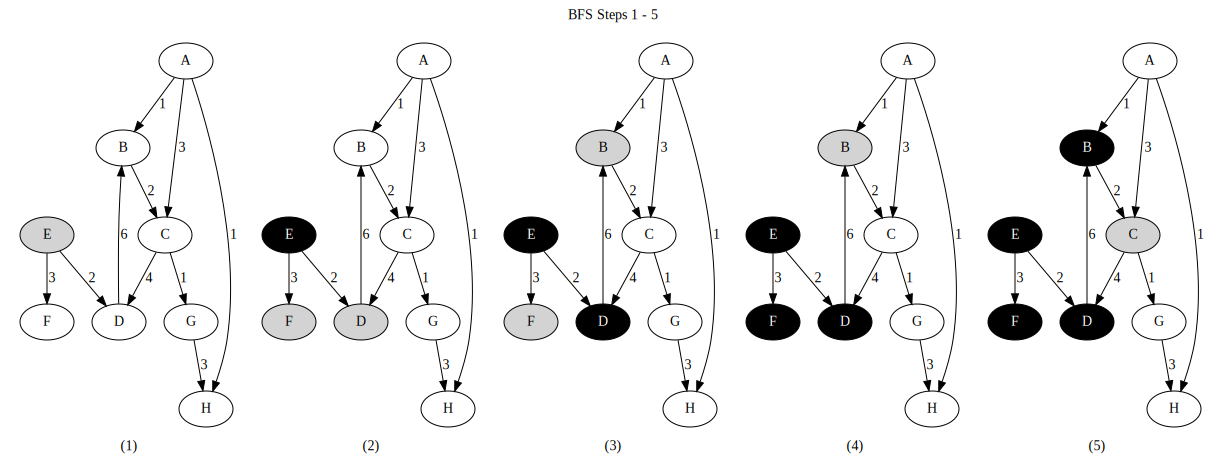

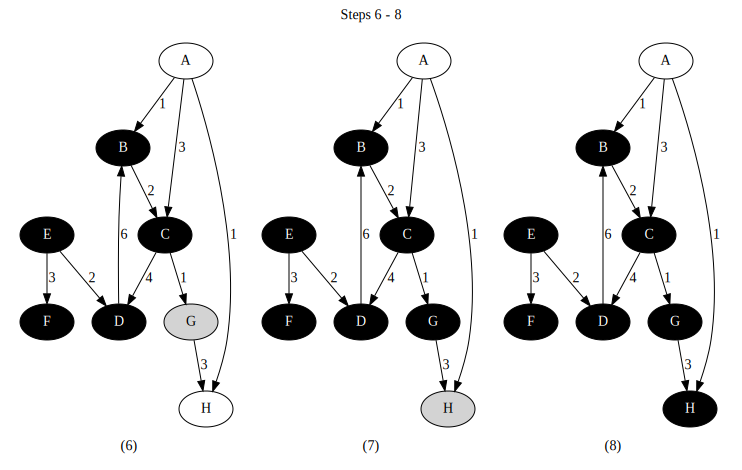

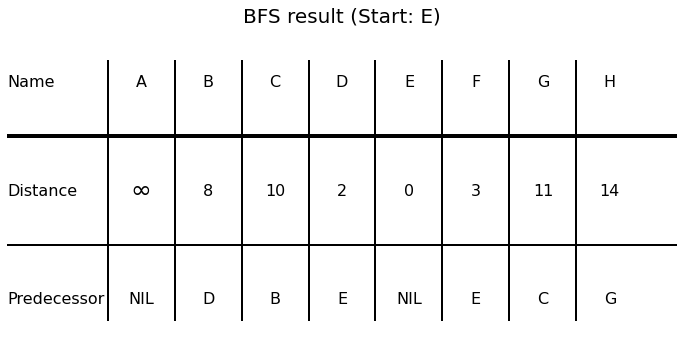

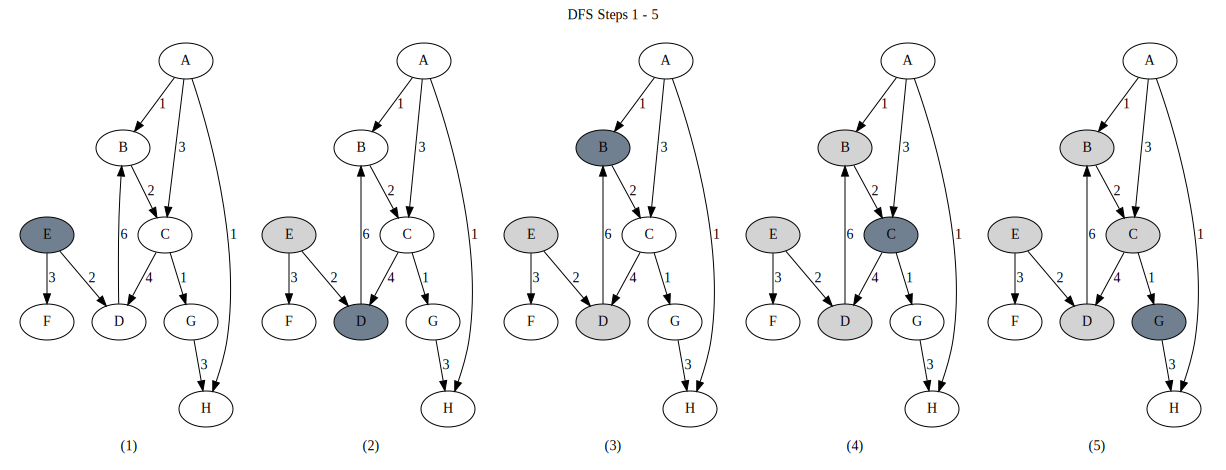

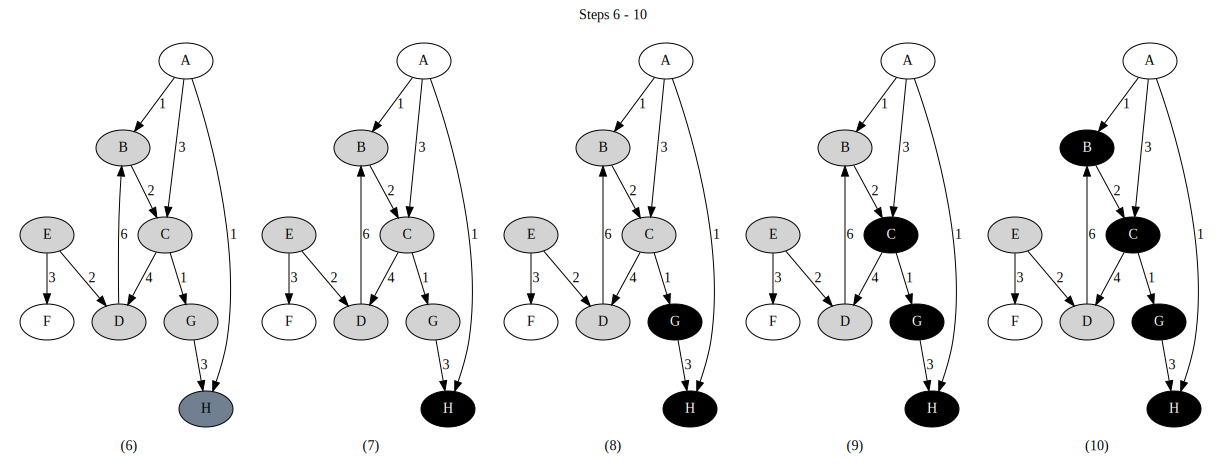

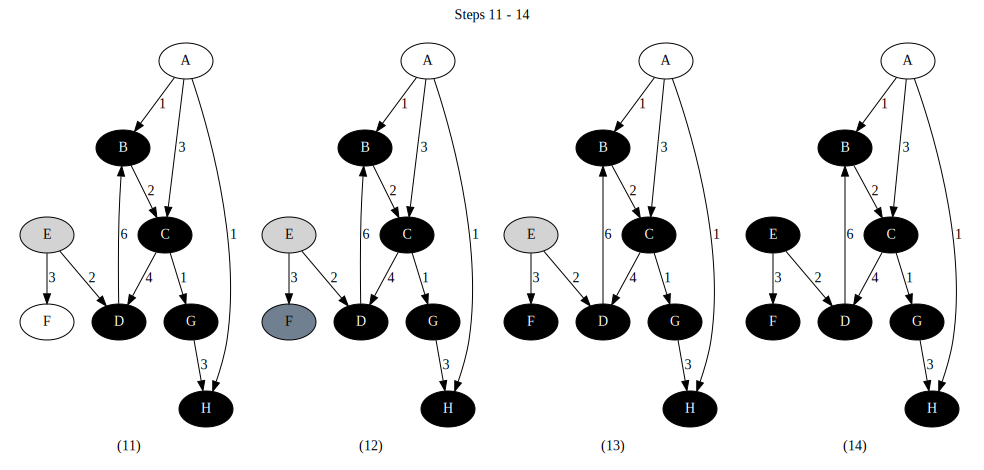

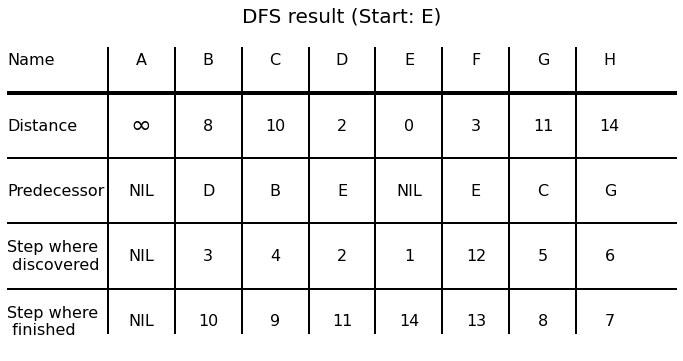

In [13]:
# Input the names of the nodes here

nodearray = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# It is a list (array) of 3-tuples. left and middle components are strings refering to the node names. Left is the start of an edge and the middle is the destination.
# the rightmost value is the weight of said edge.
# Syntax: edgearray = [('START', 'DESTINATION', WEIGHT), ('STARTx', 'DESTINATIONy', WEIGHTz), ...]
# If you want an unweighted graph, replace the above boolean True with a False. In that case you can use any random weights and they will be turned to 1 automatically,
# meaning edgearray = [('A', 'B', 12), ('B', 'C', 151)] will be turned to [('A', 'B', 1), ('B', 'C', 1)]
# Alternatively you can just leave out the weight altogether. Doing this will result in weight 1 regardless of whether its a weighted graph or not
# edgearray = [('A', 'B'), ('B', 'C')] is the same as [('A', 'B', 1), ('B', 'C', 1)]

edgearray = [('A', 'B', 1), ('A', 'C', 3), ('B', 'C', 2), ('D', 'B', 6), ('C', 'D', 4), ('E', 'D', 2), ('E', 'F', 3), ('C', 'G', 1), ('A', 'H', 1), ('G', 'H', 3)]

# Name of the node you want to start from
start = 'E'

# Note that BFS is only guranteed to display the shortest path if all weights are set to the same number (e.g 1).
add_nodes(nodearray)
add_edges(edgearray)
bfs(start)
dfs(start)